In [34]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

In [35]:
world = gpd.read_file('geoplot-data-master/world.geojson')

In [36]:
world.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [37]:
countries_count = {}
for c in world.name:
    countries_count[c]=0

In [38]:
import json

with open('countries.json') as json_file:
    data = json.load(json_file)

In [39]:
data

{'null': 141920,
 'USA': 9621,
 'China': 6451,
 'Italy': 3759,
 'UK': 3247,
 'France': 2327,
 'Canada': 2233,
 'Germany': 2025,
 'Australia': 1885,
 'India': 1805,
 'Spain': 1669,
 'Japan': 1393,
 'United States': 1226,
 'United Kingdom': 1184,
 'Brazil': 1079,
 'Switzerland': 938,
 'The Netherlands': 891,
 'Iran': 810,
 'Belgium': 751,
 'Taiwan': 745,
 'United States of America': 688,
 'Sweden': 622,
 'Turkey': 560,
 'Singapore': 530,
 'Saudi Arabia': 521,
 'PR China': 482,
 'Korea': 459,
 "People's Republic of China": 443,
 'Poland': 438,
 'Israel': 429,
 'Greece': 403,
 'Republic of Korea': 402,
 'Denmark': 393,
 'South Africa': 346,
 'Austria': 343,
 'Ireland': 340,
 'Portugal': 314,
 'Malaysia': 310,
 'USA, USA': 305,
 'Egypt': 303,
 'Pakistan': 301,
 'China, China': 286,
 'the Netherlands': 280,
 'Finland': 269,
 'Thailand': 252,
 'Bangladesh': 224,
 'Norway': 201,
 'Russia': 199,
 'P.R. China': 197,
 'South Korea': 196,
 'Mexico': 196,
 'Nigeria': 193,
 'New Zealand': 191,
 'Arg

In [40]:
data.pop('null')

141920

In [41]:
for key, value in data.items():
    if any(name in key.lower() for name in ['usa','u.s.a','us','u.s']):
        countries_count['United States of America'] += value
    if any(name in key.lower() for name in ['uk','u.k.']):
        countries_count['United Kingdom'] += value
    if any(name in key.lower() for name in ['prc','p.r.c']):
        countries_count['China'] += value
    for country in countries_count.keys():
        if country.lower() in key.lower():
            countries_count[country] += value

In [42]:
countries_count

{'Afghanistan': 3,
 'Angola': 2,
 'Albania': 5,
 'United Arab Emirates': 89,
 'Argentina': 212,
 'Armenia': 7,
 'Antarctica': 0,
 'French Southern and Antarctic Lands': 0,
 'Australia': 2034,
 'Austria': 398,
 'Azerbaijan': 6,
 'Burundi': 2,
 'Belgium': 819,
 'Benin': 9,
 'Burkina Faso': 3,
 'Bangladesh': 272,
 'Bulgaria': 30,
 'The Bahamas': 0,
 'Bosnia and Herzegovina': 8,
 'Belarus': 11,
 'Belize': 0,
 'Bermuda': 0,
 'Bolivia': 1,
 'Brazil': 1240,
 'Brunei': 2,
 'Bhutan': 3,
 'Botswana': 12,
 'Central African Republic': 2,
 'Canada': 2469,
 'Switzerland': 1019,
 'Chile': 183,
 'China': 8950,
 'Ivory Coast': 0,
 'Cameroon': 40,
 'Democratic Republic of the Congo': 8,
 'Republic of the Congo': 8,
 'Colombia': 192,
 'Costa Rica': 2,
 'Cuba': 15,
 'Northern Cyprus': 0,
 'Cyprus': 45,
 'Czech Republic': 104,
 'Germany': 2324,
 'Djibouti': 1,
 'Denmark': 436,
 'Dominican Republic': 6,
 'Algeria': 36,
 'Ecuador': 51,
 'Egypt': 315,
 'Eritrea': 0,
 'Spain': 1914,
 'Estonia': 51,
 'Ethiopia'

In [43]:
df_count = pd.DataFrame.from_dict(countries_count, orient='index', columns=['count'])

In [44]:
world = world.merge(df_count, left_on="name", right_index=True)

In [45]:
world

,id,name,geometry,count
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",3
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",2
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",5
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",89
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",212
...,...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251...",0
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241...",11
177,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401...",359
178,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...",23


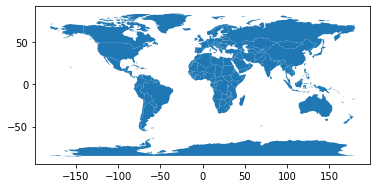

In [46]:
world.plot()

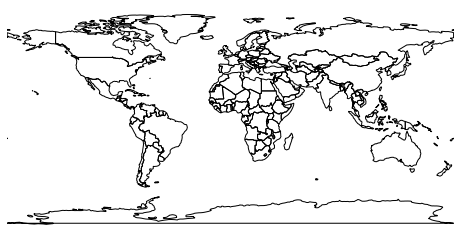

In [47]:
gplt.polyplot(world)

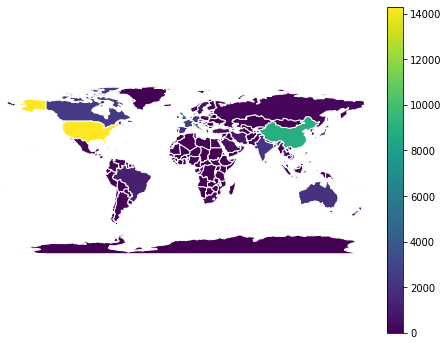

In [15]:
gplt.choropleth(
  world,
  hue="count",
  edgecolor="white",
  linewidth=1,
  legend=True,
#   scheme="FisherJenks",
#   legend_labels=[
#     "<3 million", "3-6.7 million", "6.7-12.8 million",
#     "12.8-25 million", "25-37 million"
#   ],
#   projection=gcrs.AlbersEqualArea(),
#   ax=ax
)

In [32]:
scheme = mc.Quantiles(world["count"], k=15)

/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 14
  Warn("Warning: setting k to %d" % k_q, UserWarning)


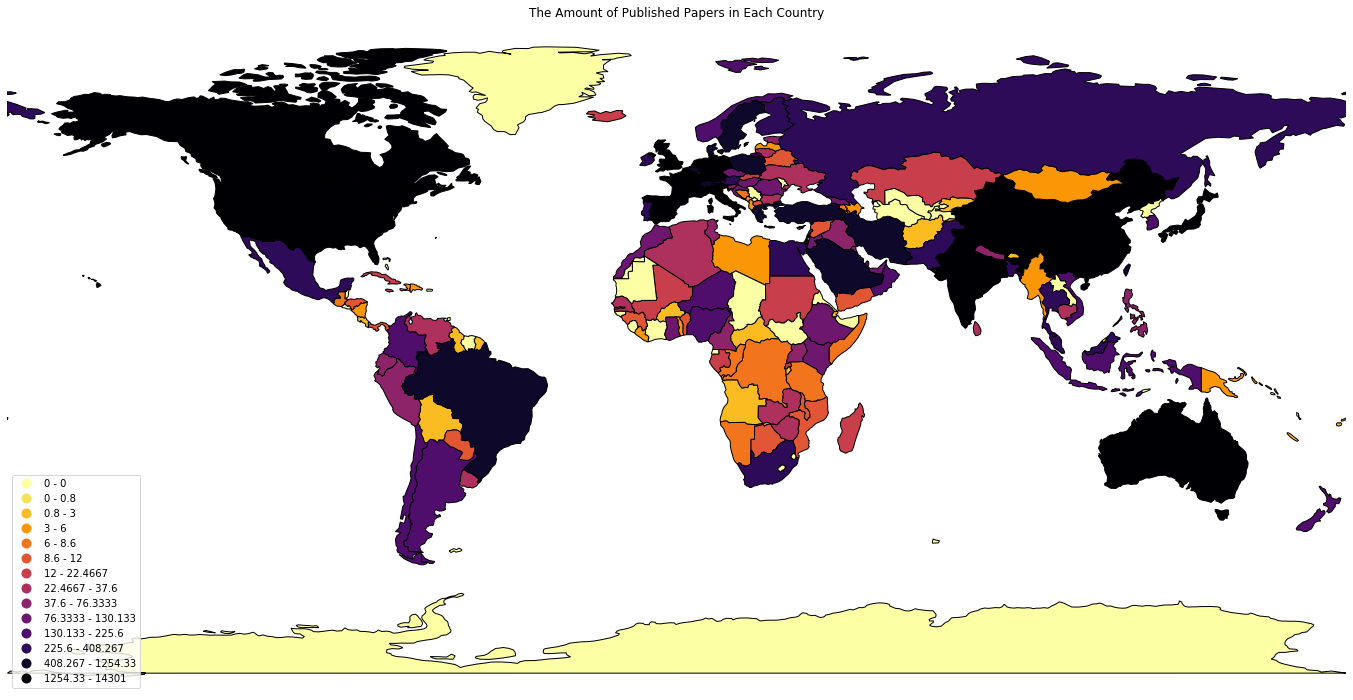

In [33]:
gplt.choropleth(
  world,
  hue="count",
  scheme=scheme,
  cmap="inferno_r",
  legend=True,
  figsize=(24,18),
)

plt.title("The Amount of Published Papers in Each Country")
plt.savefig('country_map')